# Data Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [14]:
df_domain = pd.read_csv('../../ADS ASS2/Data/combined_domain.csv')

In [12]:
df_apartment = df_domain[df_domain['Type'] == 'Apartment']
df_apartment

,Price,Address,Beds,Baths,Parking,Type,Weekly Price
6594,$240 pw,"7/520 City Road, South Melbourne VIC 3205",1,1,0,Apartment,240
6595,$395 pw,"20/283 Royal Parade, Parkville VIC 3052",1,1,0,Apartment,395
6596,$400 per week,"004B/12 Albert Street, Hawthorn East VIC 3123",1,1,0,Apartment,400
6597,$400 per week,"12/160 Grange Road, Carnegie VIC 3163",2,1,1,Apartment,400
6598,$400 pw,"9/299 Burke Road, Glen Iris VIC 3146",1,1,1,Apartment,400
...,...,...,...,...,...,...,...
12112,"$1,290","3B/25 O'Sullivan Road, Glen Waverley VIC 3150",3,2,1,Apartment,1290
12113,"$1,500 mth INC GST + O/GS","27 Ian Street, Noble Park VIC 3174",1,1,0,Apartment,1500
12114,from 1000 pcm,"18 Drummond Street, Carlton VIC 3053",3,1,1,Apartment,1000
12115,$1050pw Stay 1 mth,"250 Elizabeth Street, Melbourne VIC 3000",1,1,1,Apartment,1050


In [13]:
# Extract the floor number from address
def extract_floor_info_fixed(address):
    # If the address contains 'Level' information, directly extract the following number
    if 'Level' in address:
        match = re.search(r'Level (\d+)', address)
        if match:
            return int(match.group(1))
    
    # If it is three or four digits, extract the floor number
    parts = address.split('/')
    if len(parts) > 1 and parts[0].isdigit():
        if len(parts[0]) == 3:
            return int(parts[0][0])
        elif len(parts[0]) == 4:
            return int(parts[0][:2])
    
    #  If there is no relevant information, the default floor is ground floor just be 1
    return 1

# Add the floor number column
df_apartment['Floor Number'] = df_apartment['Address'].apply(extract_floor_info_fixed)

df_apartment

/var/folders/6h/l3lkzl091tq1btbgkvc4_pkr0000gn/T/ipykernel_22141/1974349623.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartment['Floor Number'] = df_apartment['Address'].apply(extract_floor_info_fixed)


,Price,Address,Beds,Baths,Parking,Type,Weekly Price,Floor Number
6594,$240 pw,"7/520 City Road, South Melbourne VIC 3205",1,1,0,Apartment,240,1
6595,$395 pw,"20/283 Royal Parade, Parkville VIC 3052",1,1,0,Apartment,395,1
6596,$400 per week,"004B/12 Albert Street, Hawthorn East VIC 3123",1,1,0,Apartment,400,1
6597,$400 per week,"12/160 Grange Road, Carnegie VIC 3163",2,1,1,Apartment,400,1
6598,$400 pw,"9/299 Burke Road, Glen Iris VIC 3146",1,1,1,Apartment,400,1
...,...,...,...,...,...,...,...,...
12112,"$1,290","3B/25 O'Sullivan Road, Glen Waverley VIC 3150",3,2,1,Apartment,1290,1
12113,"$1,500 mth INC GST + O/GS","27 Ian Street, Noble Park VIC 3174",1,1,0,Apartment,1500,1
12114,from 1000 pcm,"18 Drummond Street, Carlton VIC 3053",3,1,1,Apartment,1000,1
12115,$1050pw Stay 1 mth,"250 Elizabeth Street, Melbourne VIC 3000",1,1,1,Apartment,1050,1


In [15]:
# Count the total number of per floor
floor_counts = df_apartment['Floor Number'].value_counts().sort_index()

print(floor_counts)

Floor Number
1     3288
2      296
3      212
4      152
5      143
      ... 
76       2
77       2
78       1
80       1
83       2
Name: count, Length: 75, dtype: int64


In [17]:
correlation_apartment = df_apartment[['Beds', 'Baths', 'Parking', 'Floor Number']].corrwith(df_apartment['Weekly Price'])
correlation_apartment

Beds            0.485440
Baths           0.568956
Parking         0.116243
Floor Number    0.341767
dtype: float64

## Internal Correlation

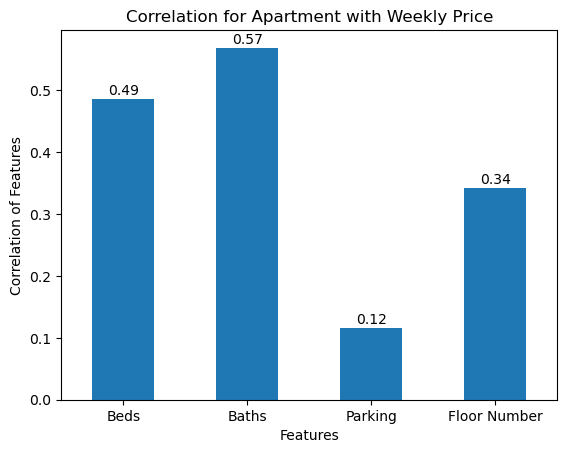

In [27]:
# Create the bar plot
ax = correlation_apartment.plot(kind='bar')

# Add the labels and title
plt.xlabel('Features')
plt.ylabel('Correlation of Features')
plt.title('Correlation for Apartment with Weekly Price')
plt.xticks(rotation=0)

# Add the number on each bar and reserve two decimals
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
                
plt.show()

In [23]:
df_house_townhouse = df_domain[df_domain['Type'].isin(['House', 'Townhouse'])]
df_house_townhouse

,Price,Address,Beds,Baths,Parking,Type,Weekly Price
0,$270 per week,"50 Elmhurst Road, Bayswater North VIC 3153",1,1,0,House,270
1,280,"63 Pintail Drive, Melton South VIC 3338",1,1,0,House,280
2,300,"8 Jacobena Road, Melton South VIC 3338",1,1,0,House,300
3,$400.00,"126 Portarlington Road, Newcomb VIC 3219",3,1,1,House,400
4,$395.00,"123 Mossfiel Drive, Hoppers Crossing VIC 3029",3,2,2,House,395
...,...,...,...,...,...,...,...
13461,$770,"16 Amara Circuit, Oakleigh South VIC 3167",3,2,2,Townhouse,770
13462,$800,"78 Middleborough Road, Burwood East VIC 3151",3,2,1,Townhouse,800
13463,$900,"31 Botanic Drive, Glen Waverley VIC 3150",4,3,2,Townhouse,900
13464,$720,"32/29 Browns Road, Clayton VIC 3168",3,2,1,Townhouse,720


In [24]:
correlation_house_townhouse = df_house_townhouse[['Beds', 'Baths', 'Parking']].corrwith(df_house_townhouse['Weekly Price'])
correlation_house_townhouse

Beds       0.325539
Baths      0.406527
Parking    0.160263
dtype: float64

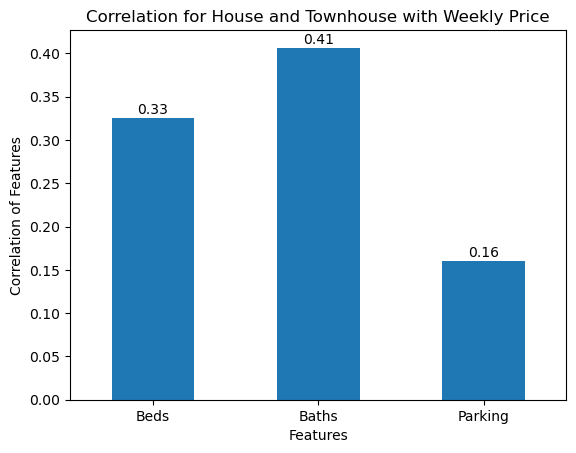

In [28]:
# Create the bar plot
ax = correlation_house_townhouse.plot(kind='bar')

# Add the labels and title
plt.xlabel('Features')
plt.ylabel('Correlation of Features')
plt.title('Correlation for House and Townhouse with Weekly Price')
plt.xticks(rotation=0)

# Add the number on each bar and reserve two decimals
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')
                
plt.show()

## External Correlation

In [3]:
data = {
    'External Features': ['Train Station', 'Bus Station', 'Tram Station', 'School', 'CBD', 'Park', 'Shopping Mall', 'Hospital'],
    'Apartment': [-0.227, -0.013, 0.017, -0.060 ,-0.285, -0.021, -0.147, -0.126],
    'House': [-0.265, 0.024, 0.162, -0.093 ,-0.314, -0.132, -0.132, -0.128]
}

df_data = pd.DataFrame(data)

print(df_data)


  External Features  Apartment  House
0     Train Station     -0.227 -0.265
1       Bus Station     -0.013  0.024
2      Tram Station      0.017  0.162
3            School     -0.060 -0.093
4               CBD     -0.285 -0.314
5              Park     -0.021 -0.132
6     Shopping Mall     -0.147 -0.132
7          Hospital     -0.126 -0.128


In [14]:
suburb_data = {
    'External Features': ['Suburb Income', 'Suburb Population Density'],
    'Correlation': [0.585, 0.412]   
}

df_suburb = pd.DataFrame(suburb_data)

print(df_suburb)

           External Features  Correlation
0              Suburb Income        0.585
1  Suburb Population Density        0.412
